# Clustering

## Generate data

In [1]:
import matplotlib.pyplot as plt

from sklearn.cluster import kmeans_plusplus
from sklearn.datasets import make_blobs

# Generate sample data
n_samples = 4000
n_cluster = 4

X, y = make_blobs(
    n_samples=n_samples, centers=n_cluster, cluster_std=0.60, random_state=42
)

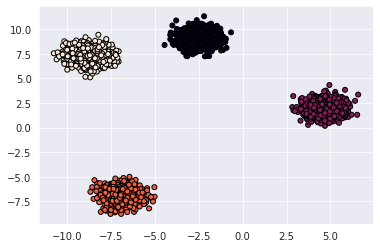

In [2]:
plt.scatter(X[:, 0], X[:, 1], marker="o", c=y, s=25, edgecolor="k")

In reality we don't have the label in a clustering problem, so what we can plot in reality is something like

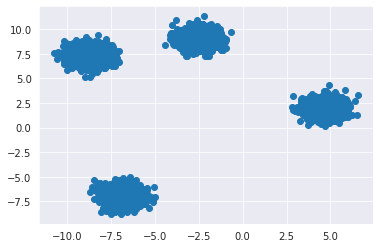

In [3]:
plt.scatter(X[:, 0], X[:, 1], marker="o")

In reality the situation can be much more complex as we will see later.

## k-means with 2 Cluster

In [4]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, n_init='auto')
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

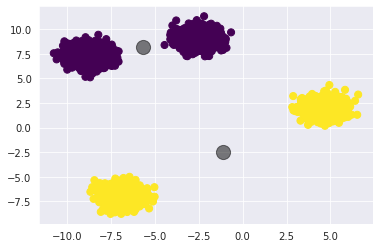

In [5]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

## Evaluation Metric

### Extrinsic Measures

These measures require ground truth labels, which may not be available in practice

#### Rand Index

Rand index does find the similarity between two clustering by considering all the pairs of the n_sample but it ranges from 0 to 1. whereas ARI ranges from -1 to 1.



In [6]:
from sklearn.metrics import rand_score

ris = rand_score(y, kmeans.labels_)
print("Rand Index: ", ris)

Rand Index:  0.7499374843710928


#### Mutual Information

Mutual Information between two clusters is a measure of the similarity between two labels of the same data. That is it is used to check the mutual information in the actual label target vs the predicted model label.

In [7]:
from sklearn.metrics import mutual_info_score

mis = mutual_info_score(y, kmeans.labels_)
print("Mutual Information: ", mis)

Mutual Information:  0.6931471805599454


### Intrinsic Measures

These measures do not require ground truth labels (applicable to all unsupervised learning results)

#### Silhouette Score aka Silhouette Coefficient
Silhouette score aka Silhouette Coefficient is an evaluation metric that results in the range of -1 to 1. A score near 1 signifies the best importance that the data point is very compact within the cluster to which it belongs and far away from the other clusters. The score near -1 signifies the least or worst importance of the data point. A score near 0 signifies overlapping clusters.

In [8]:
from sklearn.metrics import silhouette_score

ss = silhouette_score(X, kmeans.labels_)
print("Silhouette Score: ", ss)

Silhouette Score:  0.574869459465575


#### Davies-Bouldin Index
Davies-Bouldin Index score is defined as the average similarity measure of each cluster with its most similar cluster, where similarity is the ratio of within-cluster distances to between-cluster distances. Thus, clusters that are farther apart and less dispersed will result in a better score. The minimum score is 0, with lower values indicating better clustering.

In [9]:
from sklearn.metrics import davies_bouldin_score

dbs = davies_bouldin_score(X, kmeans.labels_)
print("Davies-Bouldin Index: ", dbs)

Davies-Bouldin Index:  0.92049148095456


### Elbow Method

You can easily run K-Means with several run for a range of clusters using a for loop and collecting the distortions into a list.

You can collect the distortions using the `inertia_`attribute. `inertia_`is the sum of squared distances of samples to their closest cluster center, weighted by the sample weights if provided.

Then plots the distortions of K-means.

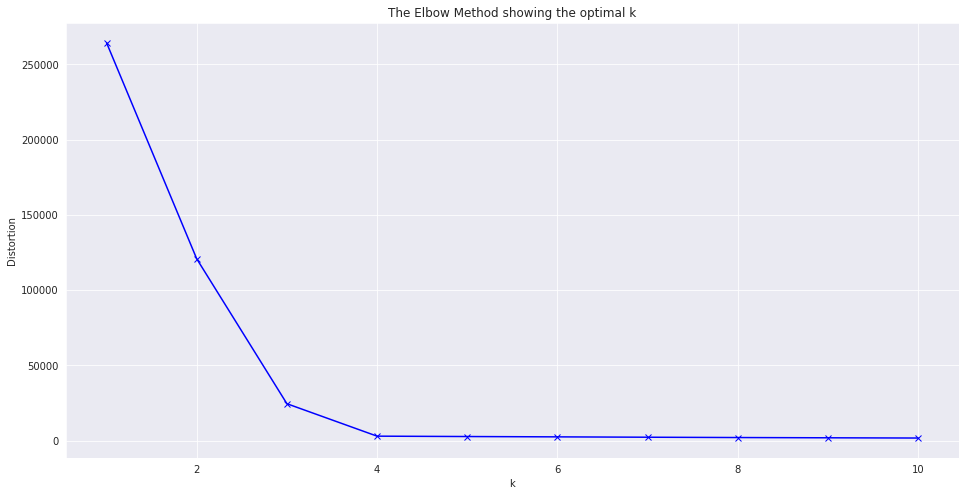

In [10]:
distortions = []
for k in range(1,11):
    km = KMeans(n_clusters=k, n_init='auto', random_state=42).fit(X)
    distortions.append(km.inertia_)

plt.figure(figsize=(16,8))
plt.plot(range(1,11), distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

### Siluette Score

Optimized at 4 clusters


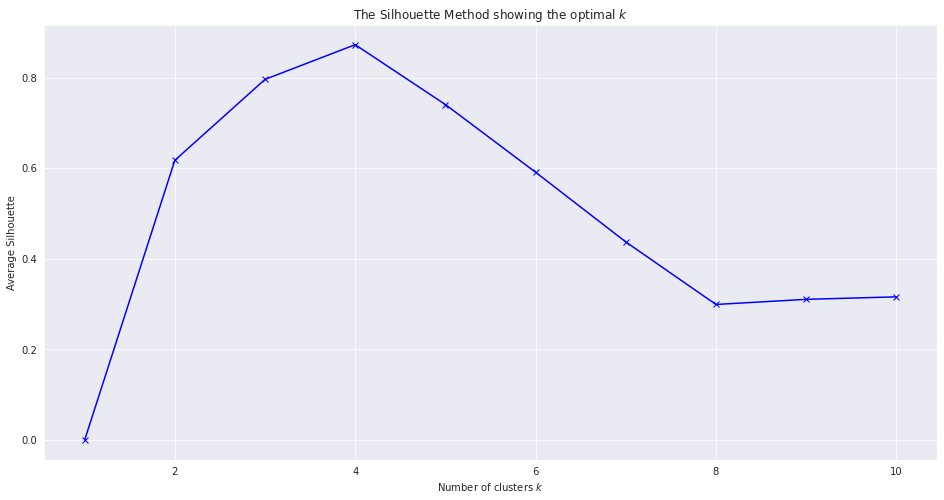

In [11]:
from sklearn.metrics import silhouette_score

scores = [0]  # silhouette score for 1 cluster
for i in range(2,11):
    km = KMeans(n_clusters=i, n_init='auto', random_state=42).fit(X)
    scores.append(silhouette_score(X, km.labels_))

print("Optimized at", max(range(len(scores)), key=scores.__getitem__)+1, "clusters")

plt.figure(figsize=(16,8))
plt.plot(range(1,11), scores, 'bx-')
plt.xlabel('Number of clusters $k$')
plt.ylabel('Average Silhouette')
plt.title('The Silhouette Method showing the optimal $k$')
plt.show()

## k-means with 4 Cluster

In [12]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, n_init='auto')
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

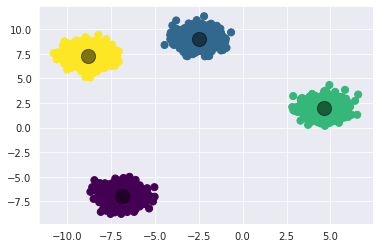

In [13]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

### Metric Comparison

In [14]:
ris_new = rand_score(y, kmeans.labels_)
mis_new = mutual_info_score(y, kmeans.labels_)
ss_new = silhouette_score(X, kmeans.labels_)
dbs_new = davies_bouldin_score(X, kmeans.labels_)

print("Old Values")
print("============================================================")
print("Rand Index: ", ris)
print("Mutual Information: ", mis)
print("Silhouette Score: ", ss)
print("Davies-Bouldin Index: ", dbs)

print("")
print("New Values")
print("============================================================")
print("Rand Index: ", ris_new)
print("Mutual Information: ", mis_new)
print("Silhouette Score: ", ss_new)
print("Davies-Bouldin Index: ", dbs_new)

Old Values
Rand Index:  0.7499374843710928
Mutual Information:  0.6931471805599454
Silhouette Score:  0.574869459465575
Davies-Bouldin Index:  0.92049148095456

New Values
Rand Index:  1.0
Mutual Information:  1.3862943611198908
Silhouette Score:  0.8726332673659424
Davies-Bouldin Index:  0.179872327643895


## More Complex situation

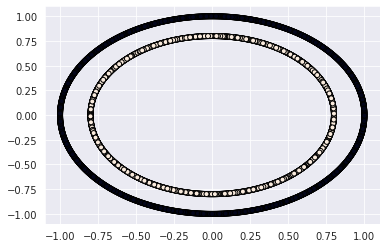

In [15]:
import matplotlib.pyplot as plt

from sklearn.cluster import kmeans_plusplus
from sklearn.datasets import make_circles

# Generate sample data
n_samples = 4000
n_cluster = 4

# Make circles with NO NOISE
X, y = make_circles(
    n_samples=n_samples, random_state=42
)

plt.scatter(X[:, 0], X[:, 1], marker="o", c=y, s=25, edgecolor="k")

## k-means with 2 Cluster

In [16]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, n_init='auto')
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

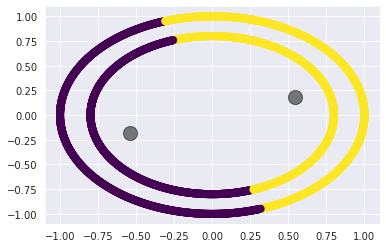

In [17]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

## Spectral Clustering

In [18]:
from sklearn.cluster import SpectralClustering

clustering = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', assign_labels='kmeans')
labels = clustering.fit_predict(X)

/home/icarrara/miniconda3/envs/Env_Igor/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


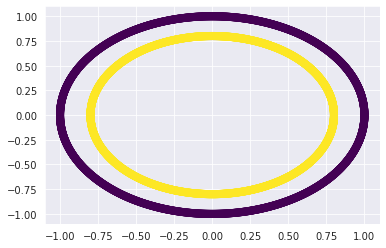

In [19]:
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')

## Hierarchical Clustering

In [20]:
from sklearn.cluster import AgglomerativeClustering

clustering = AgglomerativeClustering(n_clusters=2, linkage="single")
labels = clustering.fit_predict(X)

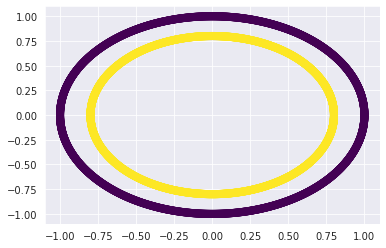

In [21]:
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')

### Plot Dendrogramm

In [22]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram

from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import load_iris


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

In [23]:
# setting distance_threshold=0 ensures we compute the full tree.
clustering = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
clustering.fit(X)

AgglomerativeClustering(distance_threshold=0, n_clusters=None)

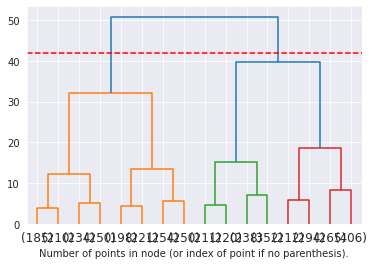

In [25]:
plot_dendrogram(clustering, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.axhline(42, color='red', linestyle='--')
plt.show()